In [7]:
import numpy as np
def upload_data_rate(w,k,p_n,h_n,n0):
    wk=np.float64(w/k)
    
    kk=np.float64((p_n*h_n)/(wk*n0))
    
    temp =np.float64(np.log2(1+kk))
    
    rn= wk*temp
    return rn


n0 = np.float64(pow(10, -174 / 10) * 0.001)
n=10
dist = np.random.uniform(0.0, 200.0,n)

def making_of_hn(d):
    h =np.zeros(n)
    for i in range(0,n):
        h[i]=dist[i]**-3
    return h

hn = making_of_hn(dist)

# pn,hn,Dn,Cn,fn,fn_local
F = np.float64(5*(10**9))
Dn = np.random.uniform(300, 500,n) 
Cn = np.random.uniform(900, 1100,n)
fn_local = np.float64(1000000000)
w= np.float64(10000000)
pn= np.float64(0.5)
K=np.float64(n)
l=10
s=3000

def local_delay(theta, c_n, fn_local):
    l= (1-theta)*c_n/fn_local
    return l

def edge_computation_delay(theta, c_n, fn):
    t =  np.float64(theta * c_n/fn)
    return t

def data_upload_delay(theta, data, rn):
    
    t=np.float64(theta * data / rn)
    return t

def local_energy(comp):
    k=np.float64(1e-27)
    localenergy= np.float64(k * (fn_local ** 2) * Cn[comp]*(10**6))
    return localenergy


def summation_of_time_for1comp(comp, theta,sum_c):
    k=np.float64(1e-27)
    tr_power = np.float64(0.5)
    W=np.float64(0)
    rn = upload_data_rate(w,K,pn,hn[comp],n0)
#     print()
    uploaddelay = data_upload_delay(theta,Dn[comp]*1000,rn)
#     print("F=", F, "theta= ", theta, "sum_c== ", sum_c)



    fn=np.float64(F*theta*Cn[comp]*(10**6))/sum_c
    edgeCompDelay = edge_computation_delay(theta,Cn[comp]*(10**6),fn)
    
    edgeCompEnergy = np.float64(tr_power * uploaddelay)
    
    localDelay = np.float64(local_delay(theta,Cn[comp]*(10**6),fn_local))
    
    localenergy= np.float64(k * (fn_local ** 2) * Cn[comp])
    
    ans=max(uploaddelay + edgeCompDelay , localDelay)
    
    W = np.float64(theta*edgeCompEnergy + (1-theta)*localenergy + ans)
#     ans = max(a)
#     print("\n\n ans=  ", ans)
    return W
    


def total_time(next_action):
    sum_c=0
    for i in range(0,n):
        if(next_action[i]>0):
            sum_c+=(next_action[i] * Cn[i]*(10**6))/l
    ans=np.float64(0)
    for comp in range(0,n):
        if(next_action[comp]>0):
            ans = ans + summation_of_time_for1comp(comp,next_action[comp]/l,sum_c)
        else:
            ans = ans + local_delay(0, Cn[comp]*(10**6), fn_local)+local_energy(comp)
    
#     print("ans==",np.int64(ans))
    return np.int64(ans*100)

In [8]:
"""import random
import numpy as np


epsilon = 0.95
alpha =0.05
gamma=0.9

""" This is our Q learning algorithm to train our model on optimized the time and energy of required in Computational Offloading"""

q_table = np.zeros((s, n, l+1))
print("New Q_Table")
q_table = np.full((s, n, l+1), -1000000)
#equation 14
def maxQ(state,i):
    t=0
    for k in range(0,l+1):
        if(t<q_table[state][i][k]):
            t=q_table[state][i][k]
        
    return t
    
def Q(state,i,theta_i,s_prime):
    reward = (-1)*state
    temp =q_table[state][i][theta_i]
    if(temp==-1000000):
        temp=0
    temp1=(maxQ(s_prime,i))
    if(temp1==-1000000):
        temp1=0
    ans = (1-alpha)*(temp) + alpha*(reward + gamma*(temp1))
    return ans
vec=np.zeros(2000)
episode = 2000

for i in range(1, episode+1):
    
    random_list = [random.randint(1, l) for _ in range(n)]
    state = total_time(random_list)
    cummulative_reward=np.int64(0)
    
    for j in range(1,2000):
        num = np.random.uniform()
        if(num>epsilon):
            next_action = [np.argmax(q_table[state][comp]) for comp in range(n)]
        else:
            next_action = [random.randint(0, l) for _ in range(n)]
            
        new_state = total_time(next_action)
        reward = (-1)*new_state
        cummulative_reward+=reward
        
        for comp in range(0,n):
            q_table[state][comp][next_action[comp]] = Q(state,comp,next_action[comp],new_state)
        
            
        state = new_state
    vec[i-1]=cummulative_reward
"""

New Q_Table


In [27]:
# making of csv data file for q_values of table 

# import pandas as pd
# import csv
# with open("aadhavan_sharma.csv","a",newline="") as file:
#     writer =csv.writer(file)
#     for aa in range(0,s):
#         for bb in range(0,n):
#             for cc in range(0,l+1):
#                 writer.writerow([aa, bb, cc, q_table[aa][bb][cc]])


# file.close()
# print(vec)
# print(vec.size)
# df=pd.read_csv("aadhavan_sharma.csv")
# df

In [30]:
import pandas as pd
import numpy as np
import random

df=pd.read_csv("aadhavan_sharma.csv")

local_action = np.full(n, 0)
edge_action = np.full(n, l)

local_state = total_time(local_action)

edge_state = total_time(edge_action)

print("local state = ", local_state)
print("edge state = ", edge_state)

iters=20
arr=np.zeros(20)
for i in range(iters):
    some_act = [random.uniform(0, l) for _ in range(n)]
    
    some_action=np.asarray(some_act)
    some_action=some_action.astype('int64')
#     some_action=np.flip(some_action)
#     print("some_action==",some_action)

    
    some_state = total_time(some_action)
    
    
    print("offload action = ", some_action)
    
    print("offload state = ", some_state)
    arr[i]=some_state
#     print(arr[i])
    
    q_values = np.float64(0)
    
    for comp in range(n):
        rir=some_action[comp]
        d = df[ (df['state']==some_state) & (df['task']==comp) & (df['part']==rir) ]
        
        print("df==\n",d)
        
        checkk=d.iloc[0,3]
        
        print("\n\ncheckk=== ",checkk)
        
        if(checkk != -1000000):
            q_values += checkk
    print("long term reward = ", q_values,"\n\n")
#     arr=np.resize(arr,19)
    


local state =  1973
edge state =  1997
offload action =  [0 9 5 2 5 2 4 6 0 3]
offload state =  975
df==
         state  task  part  qvalue
107250    975     0     0    -956


checkk===  -956
df==
         state  task  part  qvalue
107270    975     1     9    -956


checkk===  -956
df==
         state  task  part  qvalue
107277    975     2     5    -956


checkk===  -956
df==
         state  task  part  qvalue
107285    975     3     2    -956


checkk===  -956
df==
         state  task  part  qvalue
107299    975     4     5    -956


checkk===  -956
df==
         state  task  part  qvalue
107307    975     5     2    -956


checkk===  -956
df==
         state  task  part  qvalue
107320    975     6     4    -956


checkk===  -956
df==
         state  task  part  qvalue
107333    975     7     6    -956


checkk===  -956
df==
         state  task  part  qvalue
107338    975     8     0    -956


checkk===  -956
df==
         state  task  part  qvalue
107352    975     9     3    -95

df==
        state  task  part  qvalue
99883    908     0     3    -888


checkk===  -888
df==
        state  task  part  qvalue
99895    908     1     4    -888


checkk===  -888
df==
        state  task  part  qvalue
99906    908     2     4    -888


checkk===  -888
df==
        state  task  part  qvalue
99921    908     3     8    -888


checkk===  -888
df==
        state  task  part  qvalue
99927    908     4     3    -888


checkk===  -888
df==
        state  task  part  qvalue
99938    908     5     3    -888


checkk===  -888
df==
        state  task  part  qvalue
99955    908     6     9    -888


checkk===  -888
df==
        state  task  part  qvalue
99960    908     7     3    -888


checkk===  -888
df==
        state  task  part  qvalue
99969    908     8     1    -888


checkk===  -888
df==
        state  task  part  qvalue
99986    908     9     7    -888


checkk===  -888
long term reward =  -8880.0 


offload action =  [9 6 1 4 6 6 4 8 2 8]
offload state =  1072
df==
  

1048.55


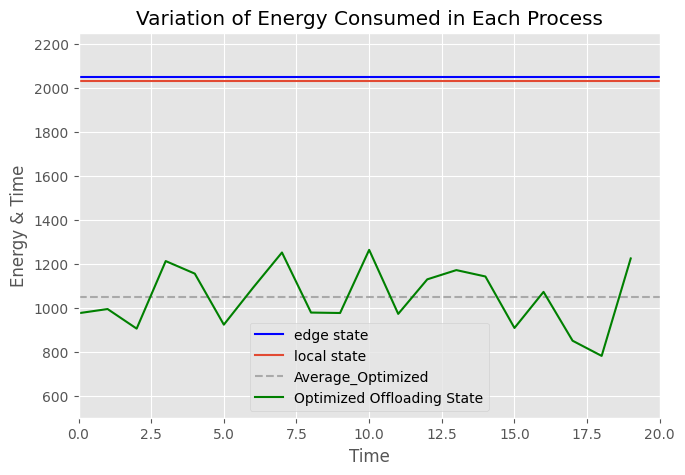

In [34]:
# Import Library

import matplotlib.pyplot as plt
import matplotlib.style as style

# Plot vertical line
style.use('ggplot')
plt.rcParams["figure.figsize"] = [7.50, 5.0]

plt.axhline(y=2051, label="edge state",color="blue")
plt.axhline(y=2031,label="local state")
# x=np.arange(1,200,200)
# y=arr

x = np.arange(0,20,1)
y=arr
ar=0
for i in range(0,20):
    ar+=arr[i]
a=ar/arr.size
print(a)
plt.axhline(y=a,label="Average_Optimized",color="#A9A9A9",linestyle="dashed")

plt.title("Line graph")
# plt.plot(x, y, color="red")

   
# Show
plt.xlim(0, 20)

plt.ylim(500, 2250)
plt.ylabel("Energy & Time")
plt.xlabel("Time")
plt.plot(x,y, label="Optimized Offloading State",color="green")
plt.title("Variation of Energy Consumed in Each Process")
plt.legend()
plt.show()

In [20]:
# ... making of csv file for reward values per episode ...

# import pandas as pd
# import csv

# with open("reward_values.csv","a",newline="") as file:
#     writer =csv.writer(file)
#     for aa in range(0,vec.size):
#         writer.writerow([vec[aa]])
        
# df=pd.read_csv("reward_values.csv")
# df

,reward
0,-2243000.0
1,-2210325.0
2,-2215676.0
3,-2216653.0
4,-2189242.0
...,...
1995,-2283691.0
1996,-2293267.0
1997,-2309856.0
1998,-2306772.0


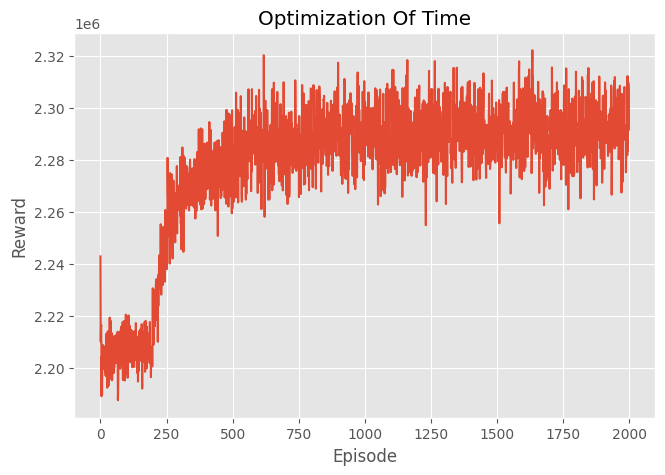

In [23]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np

dd=pd.read_csv("reward_values.csv")
# Plot vertical line
style.use('ggplot')
plt.rcParams["figure.figsize"] = [7.50, 5.0]

v=np.zeros(2000)
for i in range(0,2000):
    v[i]=dd.iloc[i,0]


# plt.ylim(1, 5)
x=np.arange(0,2000,1)
y=(-1)*v
plt.title("Optimization Of Time")
plt.ylabel("Reward")
plt.xlabel("Episode")
plt.plot(x,y)
plt.show()